In [201]:
import numpy as np
import pandas as pd

In [202]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

### *Загрузка данных*

In [203]:
df = pd.read_csv("file16.csv")

In [204]:
df.shape

(9644, 36)

In [205]:
df[['T001', 'T002', 'Fln_ShaftRotationSpeed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 3 columns):
T001                      6154 non-null float64
T002                      6169 non-null float64
Fln_ShaftRotationSpeed    6813 non-null float64
dtypes: float64(3)
memory usage: 226.1 KB


In [206]:
df.describe()[['T001', 'T002', 'Fln_ShaftRotationSpeed']]

,T001,T002,Fln_ShaftRotationSpeed
count,6154.000000,6169.000000,6813.000000
mean,46.064072,34.971859,1134.153299
std,0.380605,0.500391,610.177874
min,40.000000,31.700001,0.000000
25%,46.000000,35.000000,1435.054943
50%,46.200001,35.099998,1435.638903
75%,46.299999,35.299999,1436.215008
max,46.900002,35.299999,1937.898341


In [207]:
df.head()

,Fln_WaterFlowRate,P001,Tamb,P002,Fln_ValveOut,X001_rmsAccEnv,F001,Urms,Irms,X001_rmsAccRaw,...,X001_rmsVelRaw,Fln_Urms,Fln_PressureIn,TmotorCase,X001_iso10816,T002,Frequency,Fln_ShaftRotationSpeed,T001,Fln_ValveIn
0,0.000584,103.458321,20.639704,93.303284,90.0,0.0,-0.030442,0.0,0.001,1.0,...,0.0105,0.0,103.230049,33.228355,0.0005,35.0,0.0,0.0,45.400002,90.0
1,0.000584,103.458321,20.639704,93.303284,90.0,0.0,-0.030442,0.0,0.001,1.0,...,0.0105,0.0,103.230049,33.228355,0.0005,35.0,0.0,0.0,45.400002,90.0
2,0.000584,103.458321,20.639704,93.303284,90.0,0.0,-0.030442,0.0,0.001,1.0,...,0.0105,0.0,103.230049,33.228355,0.0005,35.0,0.0,0.0,45.400002,90.0
3,0.000584,103.458321,20.639704,93.303284,90.0,0.0,-0.030442,0.0,0.001,1.0,...,0.0105,0.0,103.230049,33.228355,0.0005,35.0,0.0,0.0,45.400002,90.0
4,0.000584,103.458321,20.639704,93.303284,90.0,0.0,-0.030442,0.0,0.001,1.0,...,0.0105,0.0,103.230049,33.228355,0.0005,35.0,0.0,0.0,45.400002,90.0


In [208]:
df.tail()

,Fln_WaterFlowRate,P001,Tamb,P002,Fln_ValveOut,X001_rmsAccEnv,F001,Urms,Irms,X001_rmsAccRaw,...,X001_rmsVelRaw,Fln_Urms,Fln_PressureIn,TmotorCase,X001_iso10816,T002,Frequency,Fln_ShaftRotationSpeed,T001,Fln_ValveIn
9639,NaN,NaN,0.0,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9640,NaN,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9641,NaN,NaN,0.0,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9642,NaN,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9643,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df.columns

Index(['Fln_WaterFlowRate', 'P001', 'Tamb', 'P002', 'Fln_ValveOut',
       'X001_rmsAccEnv', 'F001', 'Urms', 'Irms', 'X001_rmsAccRaw', 'Pmean',
       'X001_rmsVelEnv', 'C002', 'C001', 'Fln_MotorActivePower',
       'Fln_BearingLife', 'Fln_PressureOut', 'X001_peakHiFreq', 'S001',
       'timestamp', 'PowerFactor', 'RemainingUsefulLife',
       'Fln_HydraulicEfficiency', 'Fln_NPSH', 'Fln_Tresidual',
       'Fln_MotorCurrentFrequency', 'X001_rmsVelRaw', 'Fln_Urms',
       'Fln_PressureIn', 'TmotorCase', 'X001_iso10816', 'T002', 'Frequency',
       'Fln_ShaftRotationSpeed', 'T001', 'Fln_ValveIn'],
      dtype='object')

In [210]:
type(df.dtypes)

pandas.core.series.Series

### *Отбор пустых значений*

In [211]:
data = df[pd.notnull(df.T001) & pd.notnull(df.T002) & pd.notnull(df.Fln_ShaftRotationSpeed)]

In [212]:
print(df.shape)
print(data.shape)

(9644, 36)
(6154, 36)


### *3D plot*

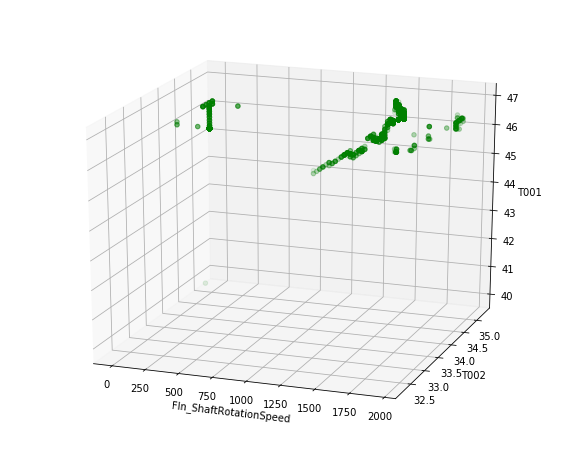

In [213]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Fln_ShaftRotationSpeed, data.T002, data.T001, color='g', alpha=0.1)

ax.set_xlabel('Fln_ShaftRotationSpeed')
ax.set_ylabel('T002')
ax.set_zlabel('T001')

ax.view_init(20, 290)

plt.show()

### *Данные для обучения*

In [214]:
X = data[['Fln_ShaftRotationSpeed', 'T002']]
y = data['T001']

In [215]:
X.dtypes

Fln_ShaftRotationSpeed    float64
T002                      float64
dtype: object

In [216]:
pd.concat([X.describe(), y.describe()], axis=1)

,Fln_ShaftRotationSpeed,T002,T001
count,6154.000000,6154.000000,6154.000000
mean,1098.029049,34.979314,46.064072
std,630.534787,0.477550,0.380605
min,0.000000,32.200001,40.000000
25%,1435.046053,35.000000,46.000000
50%,1435.638903,35.099998,46.200001
75%,1436.215008,35.299999,46.299999
max,1937.898341,35.299999,46.900002


### *Разделение на тестовую и обучающую выборки*

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

### Выбор модели обучения

In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
model = LinearRegression()

In [221]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

*Обучение модели ...*

In [222]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

*Полученные коэффициенты:*

In [223]:
print(model.coef_, model.intercept_)

[0.00050294 0.03156088] 44.40827502684557


*Результат на тестовых данных:*

In [224]:
model.score(X_test, y_test)

0.7074241869043434

In [225]:
(min(X.iloc[:,1]), max(X.iloc[:,1]))

(32.200000762939446, 35.29999923706055)

In [226]:
(min(X.iloc[:,0]), max(X.iloc[:,0]))

(0.0, 1937.89834059629)

### *Построение поверхности*

In [227]:
nx = 100
x0 = np.linspace(min(X.iloc[:,0]), max(X.iloc[:,0]), nx)
x1 = np.linspace(min(X.iloc[:,1]), max(X.iloc[:,1]), nx)
x0v, x1v = np.meshgrid(x0, x1)

In [228]:
x0v.shape

(100, 100)

In [229]:
X_m_1 = np.hstack([x0v.reshape((-1,1)), x1v.reshape((-1,1))])

In [230]:
X_m_1[8000]

array([ 0.        , 34.70505003])

In [231]:
X_m = np.vstack([x0v.flatten(), x1v.flatten()]).T

In [232]:
X_m[8000]

array([ 0.        , 34.70505003])

In [233]:
y_m_hat = model.predict(X_m)

In [234]:
y_m_hat.shape

(10000,)

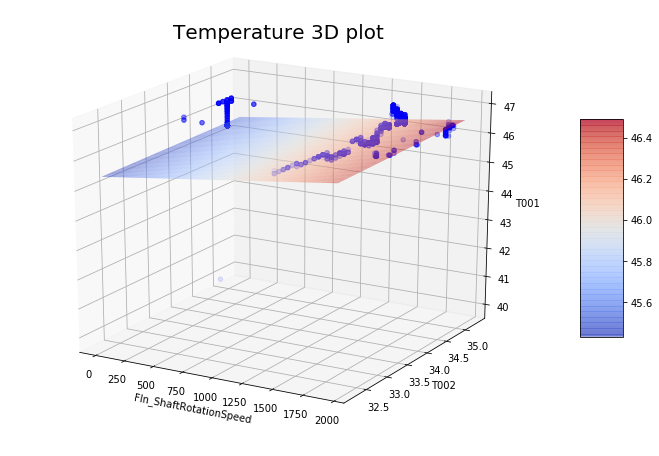

In [235]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Fln_ShaftRotationSpeed, data.T002, data.T001, color='b', alpha=0.1)

ax.set_xlabel('Fln_ShaftRotationSpeed')
ax.set_ylabel('T002')
ax.set_zlabel('T001')
ax.set_title("Temperature 3D plot", fontsize=20)

surf =ax.plot_surface(x0v, x1v, y_m_hat.reshape((100,100)), color='g', alpha=0.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(20, 300)

plt.show()

*Предсказания для некоторых точек*

In [243]:
model.predict([
              [4000, 20],
              [20000, 50],
              [10, 0],
              [0,0]
])

array([47.05123712, 56.04504165, 44.41330439, 44.40827503])